<a href="https://www.kaggle.com/code/vijays140291/voice-classification-using-neural-network?scriptVersionId=121935051" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Predicting the Voice based on gender

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

# Loading the Dataset

In [2]:
df=pd.read_csv('/kaggle/input/voicegender/voice.csv')
#showing the dataset
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


# Ploting the Histogram 

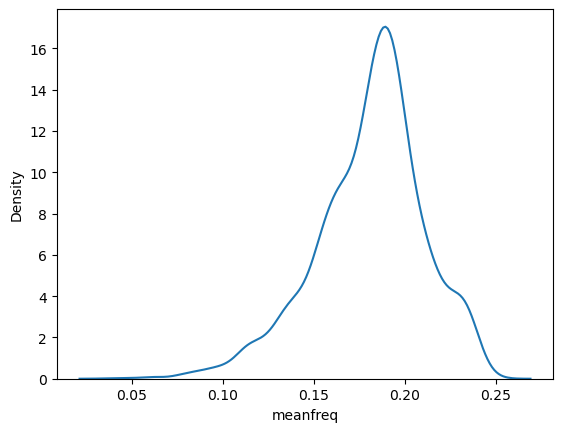

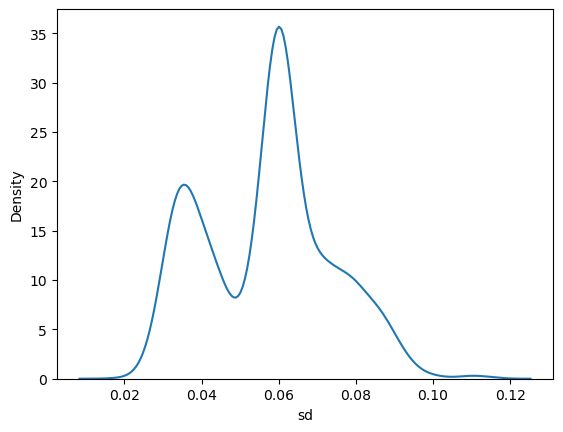

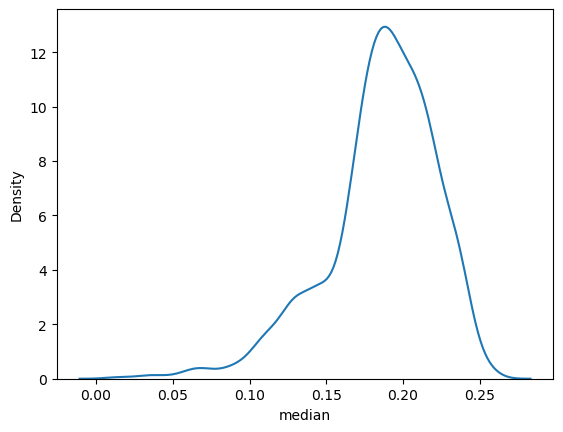

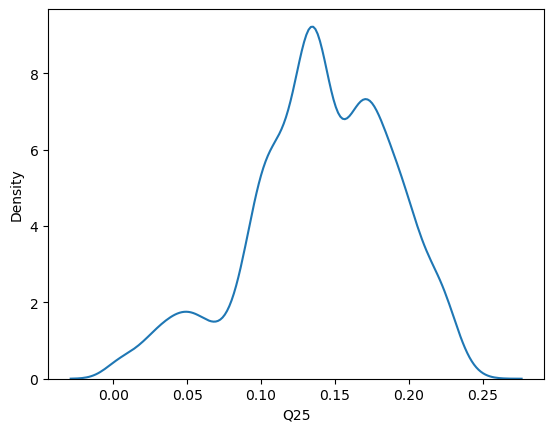

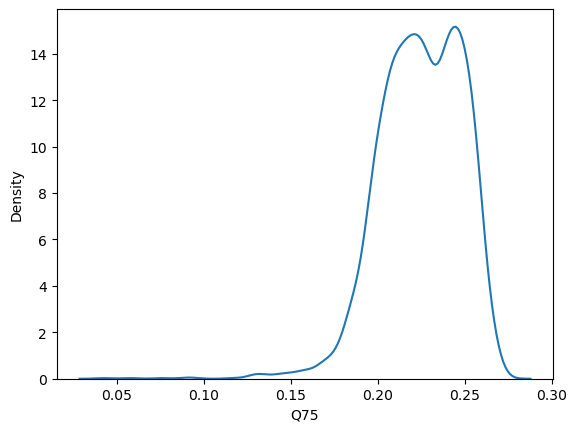

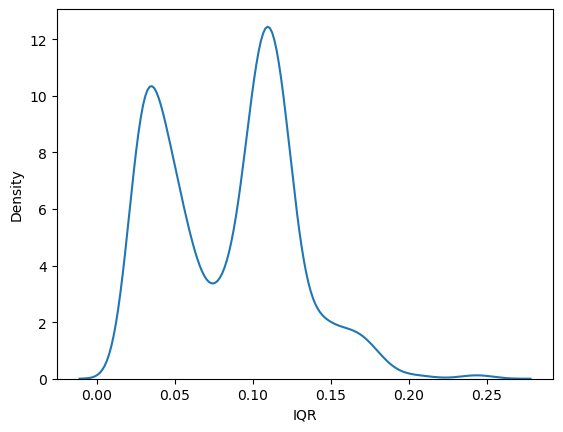

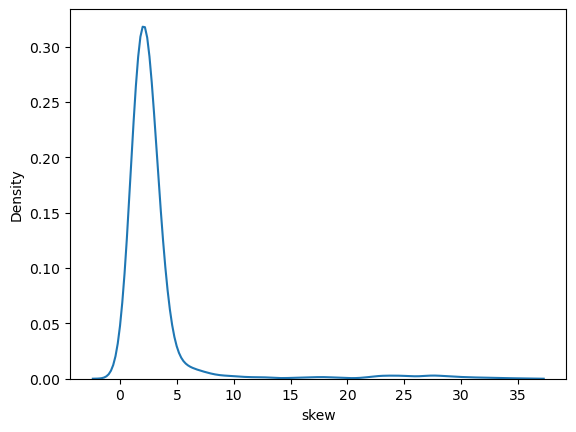

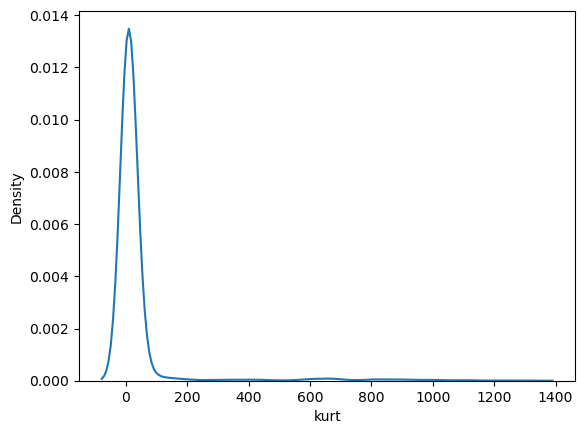

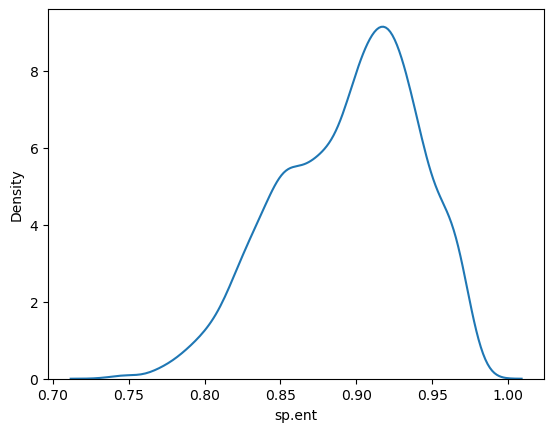

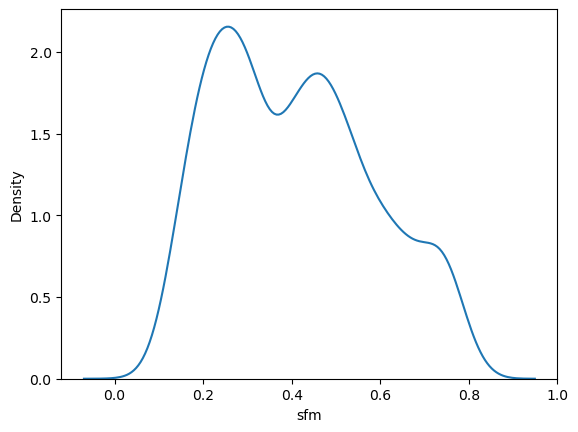

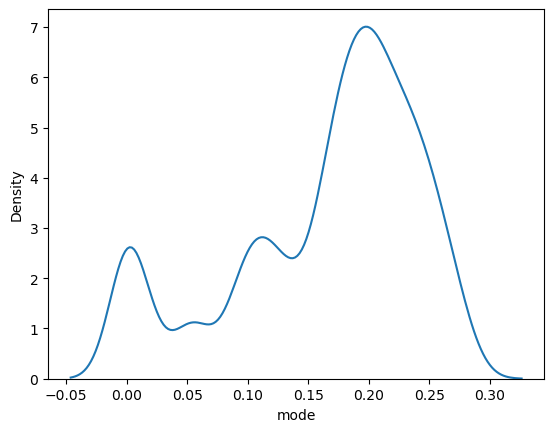

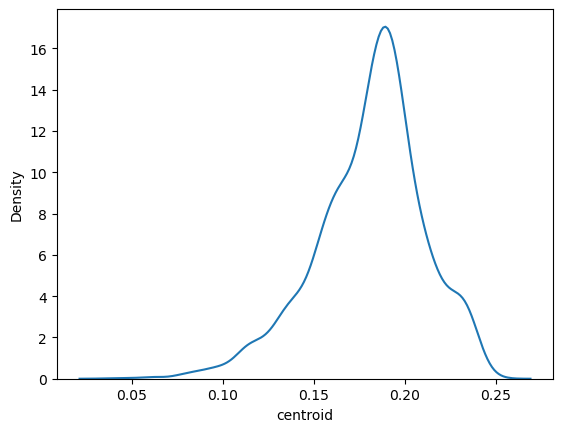

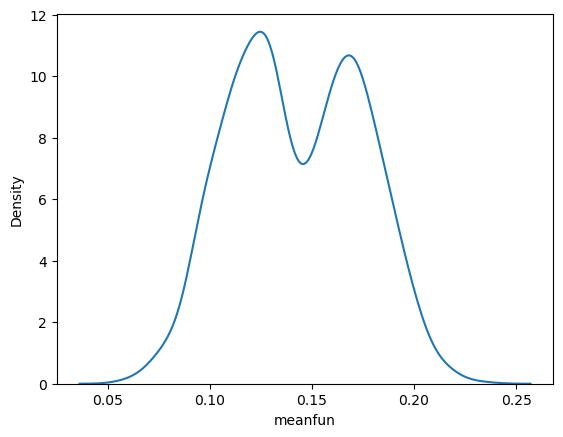

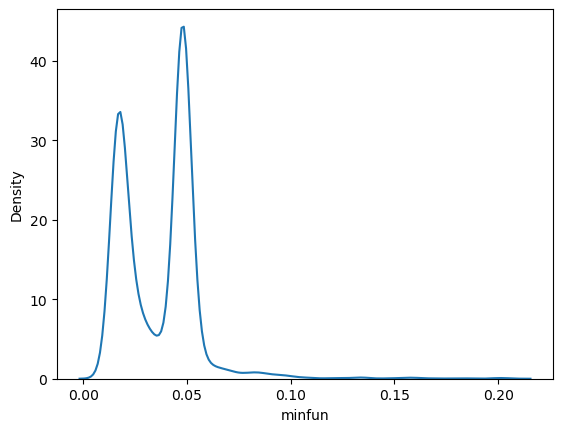

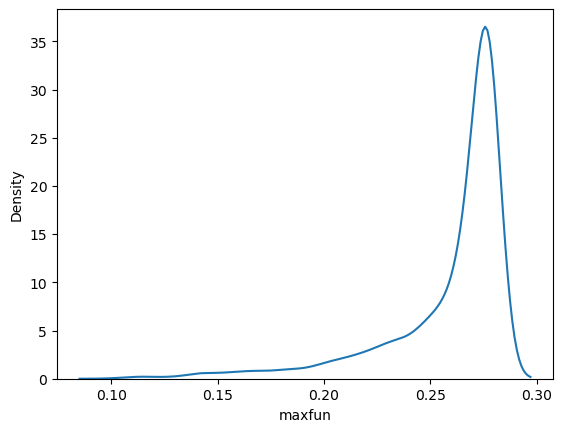

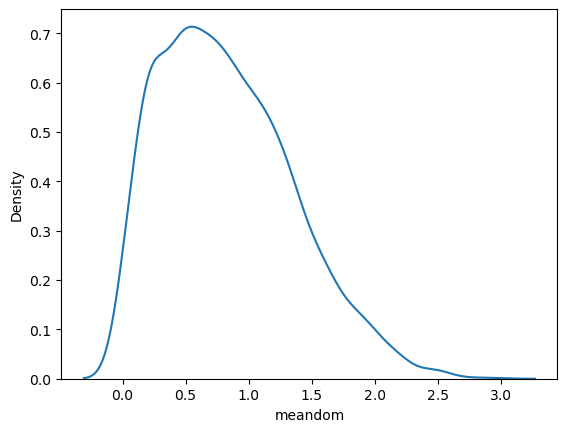

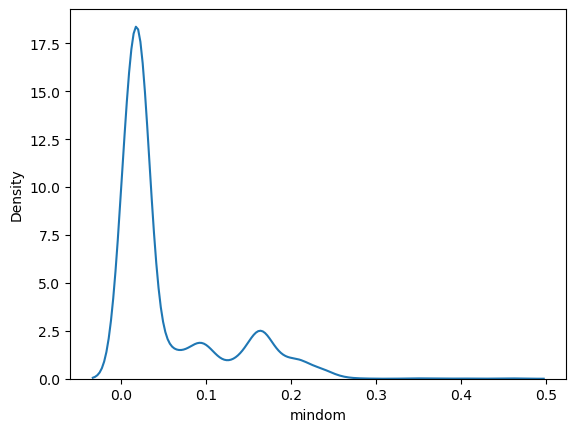

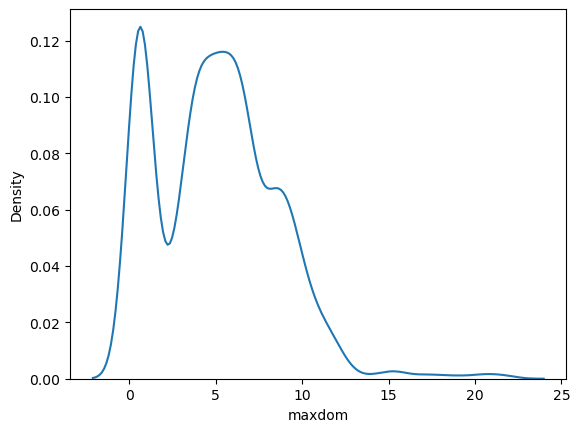

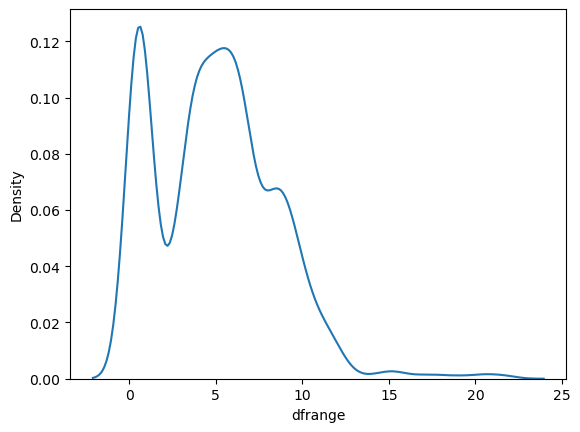

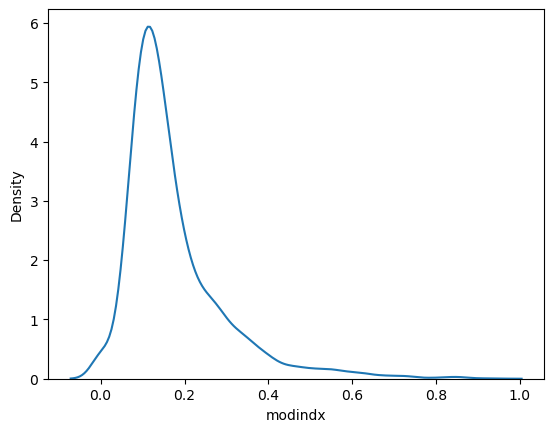

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

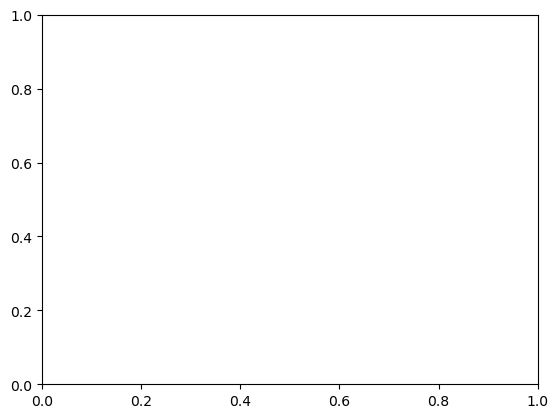

In [11]:
for column in df.columns:
    sns.kdeplot(df[column])
    plt.show()

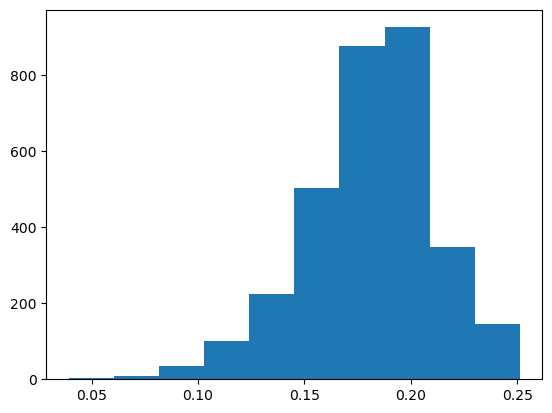

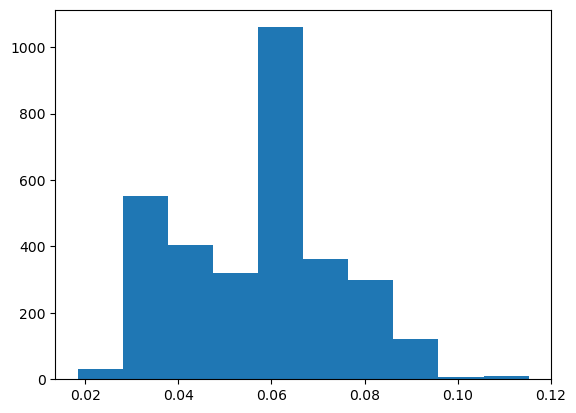

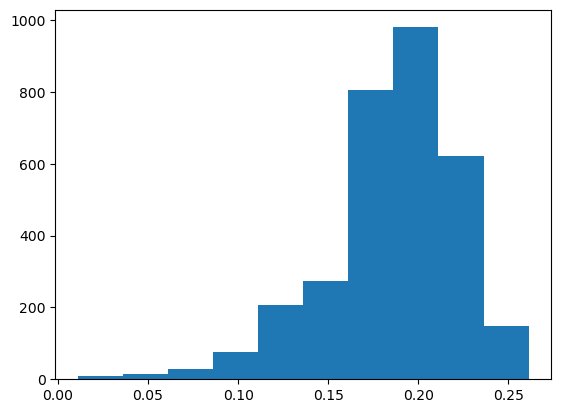

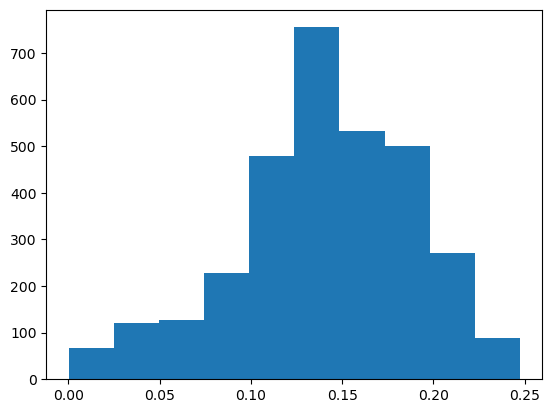

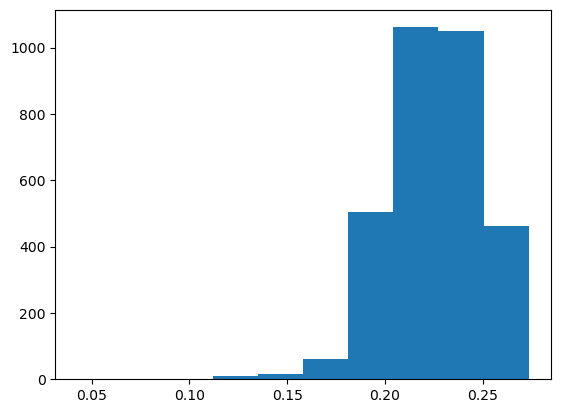

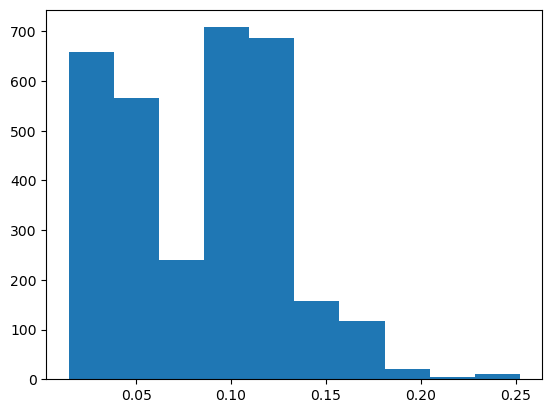

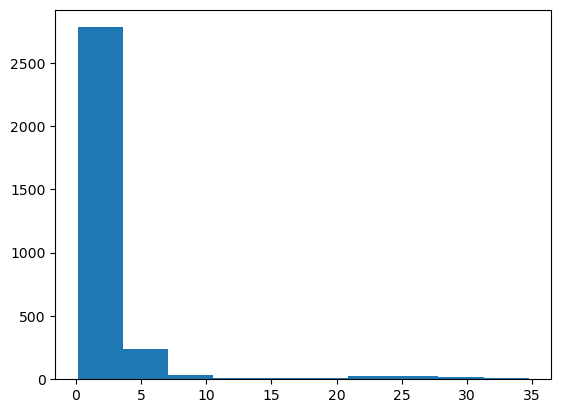

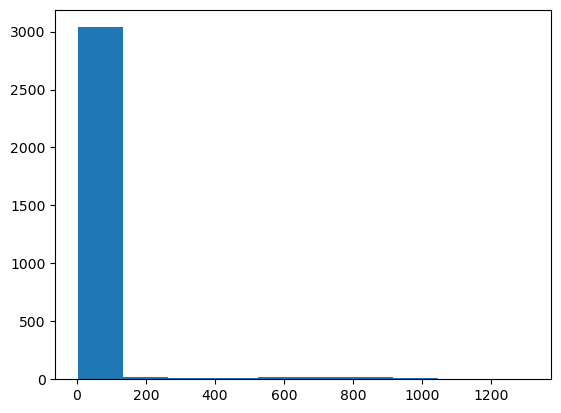

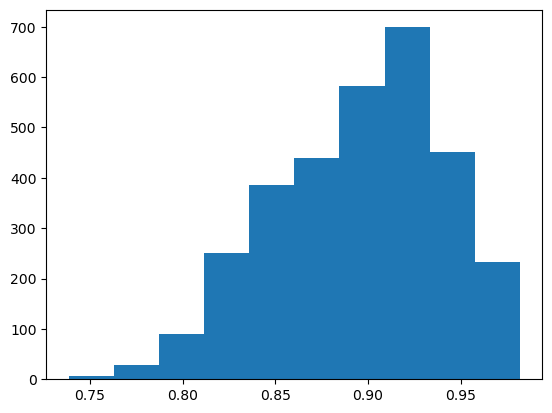

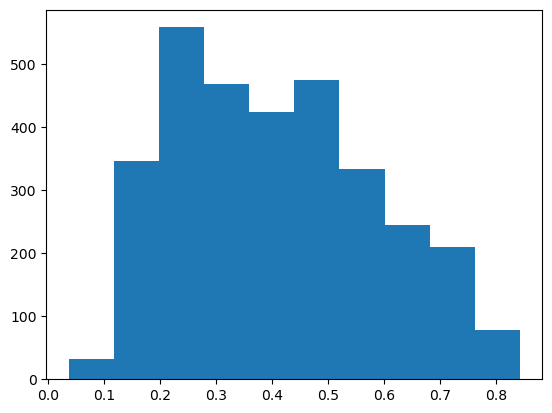

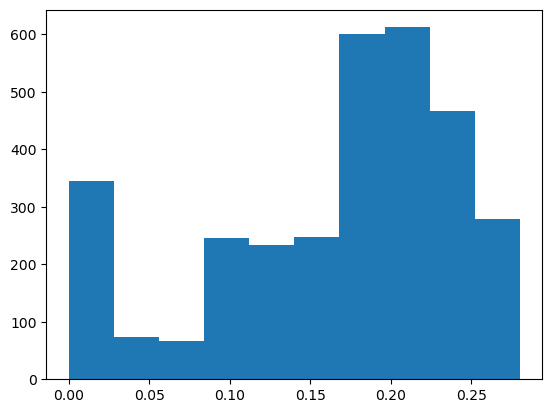

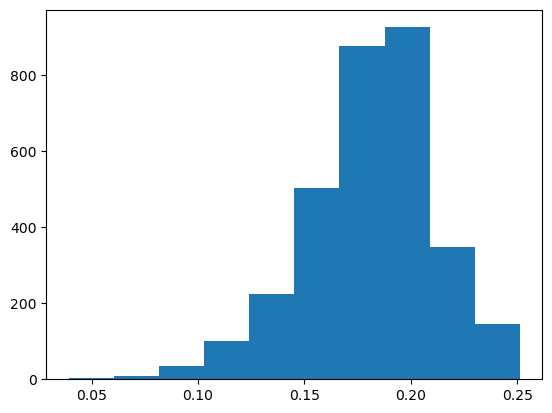

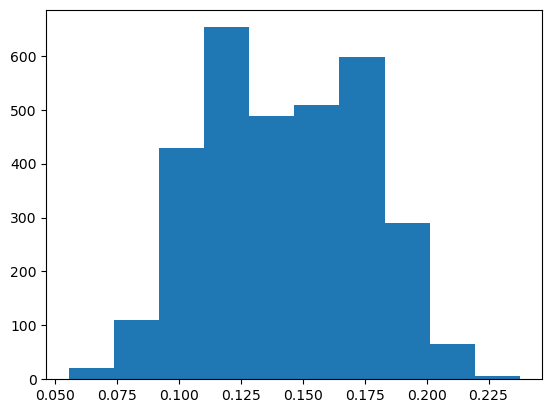

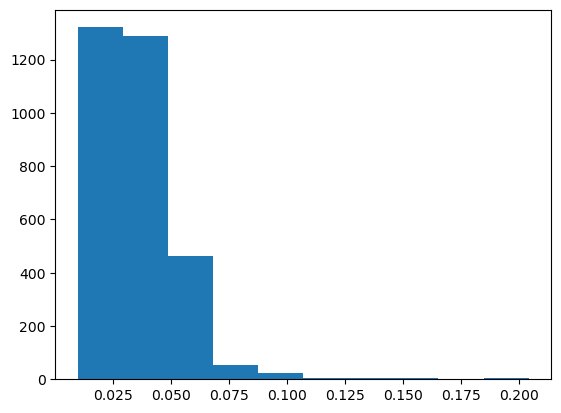

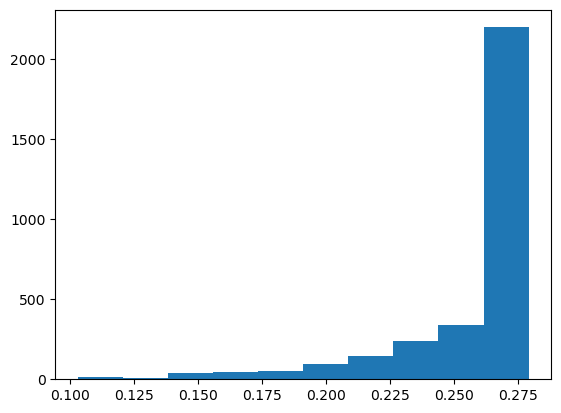

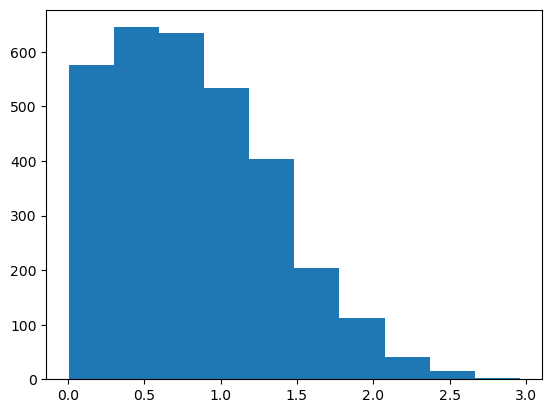

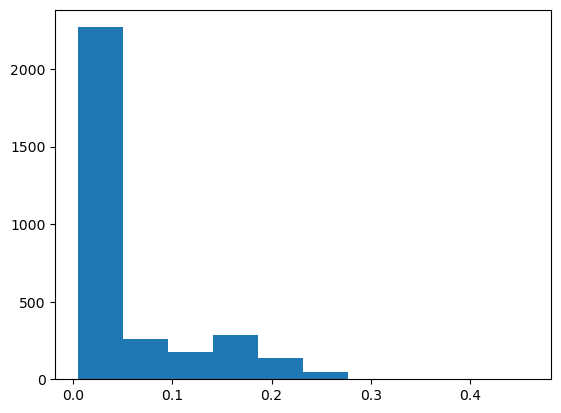

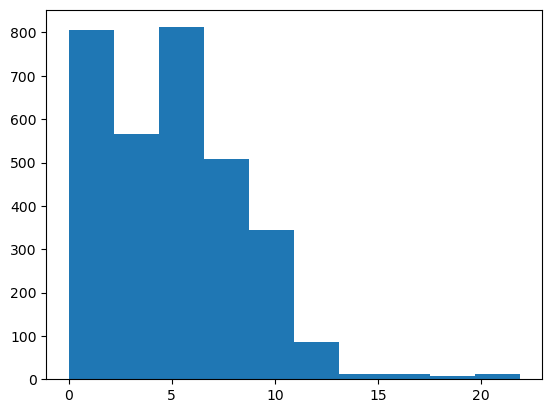

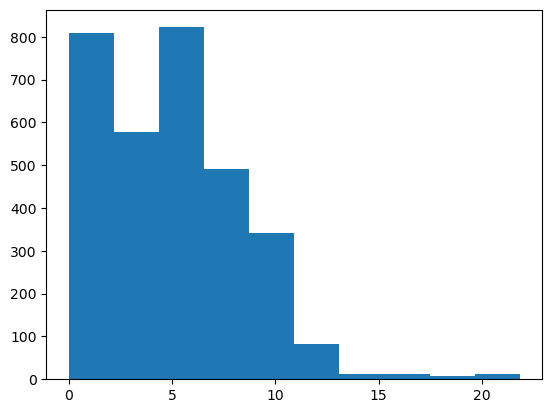

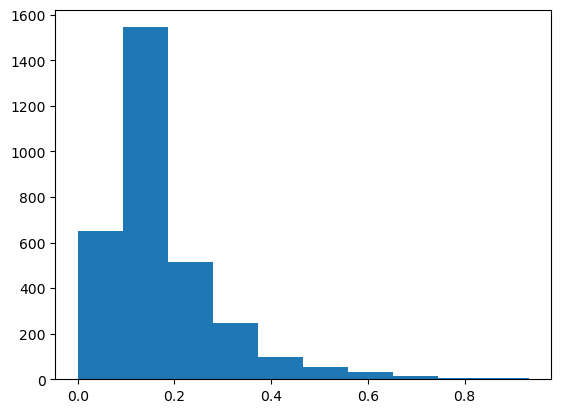

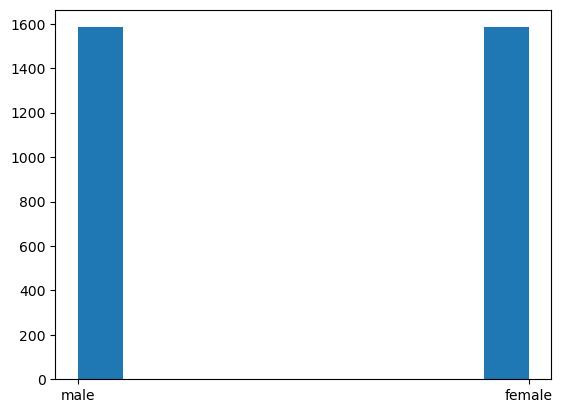

In [3]:
for column in df.columns:
    plt.hist(df[column])
    plt.show()

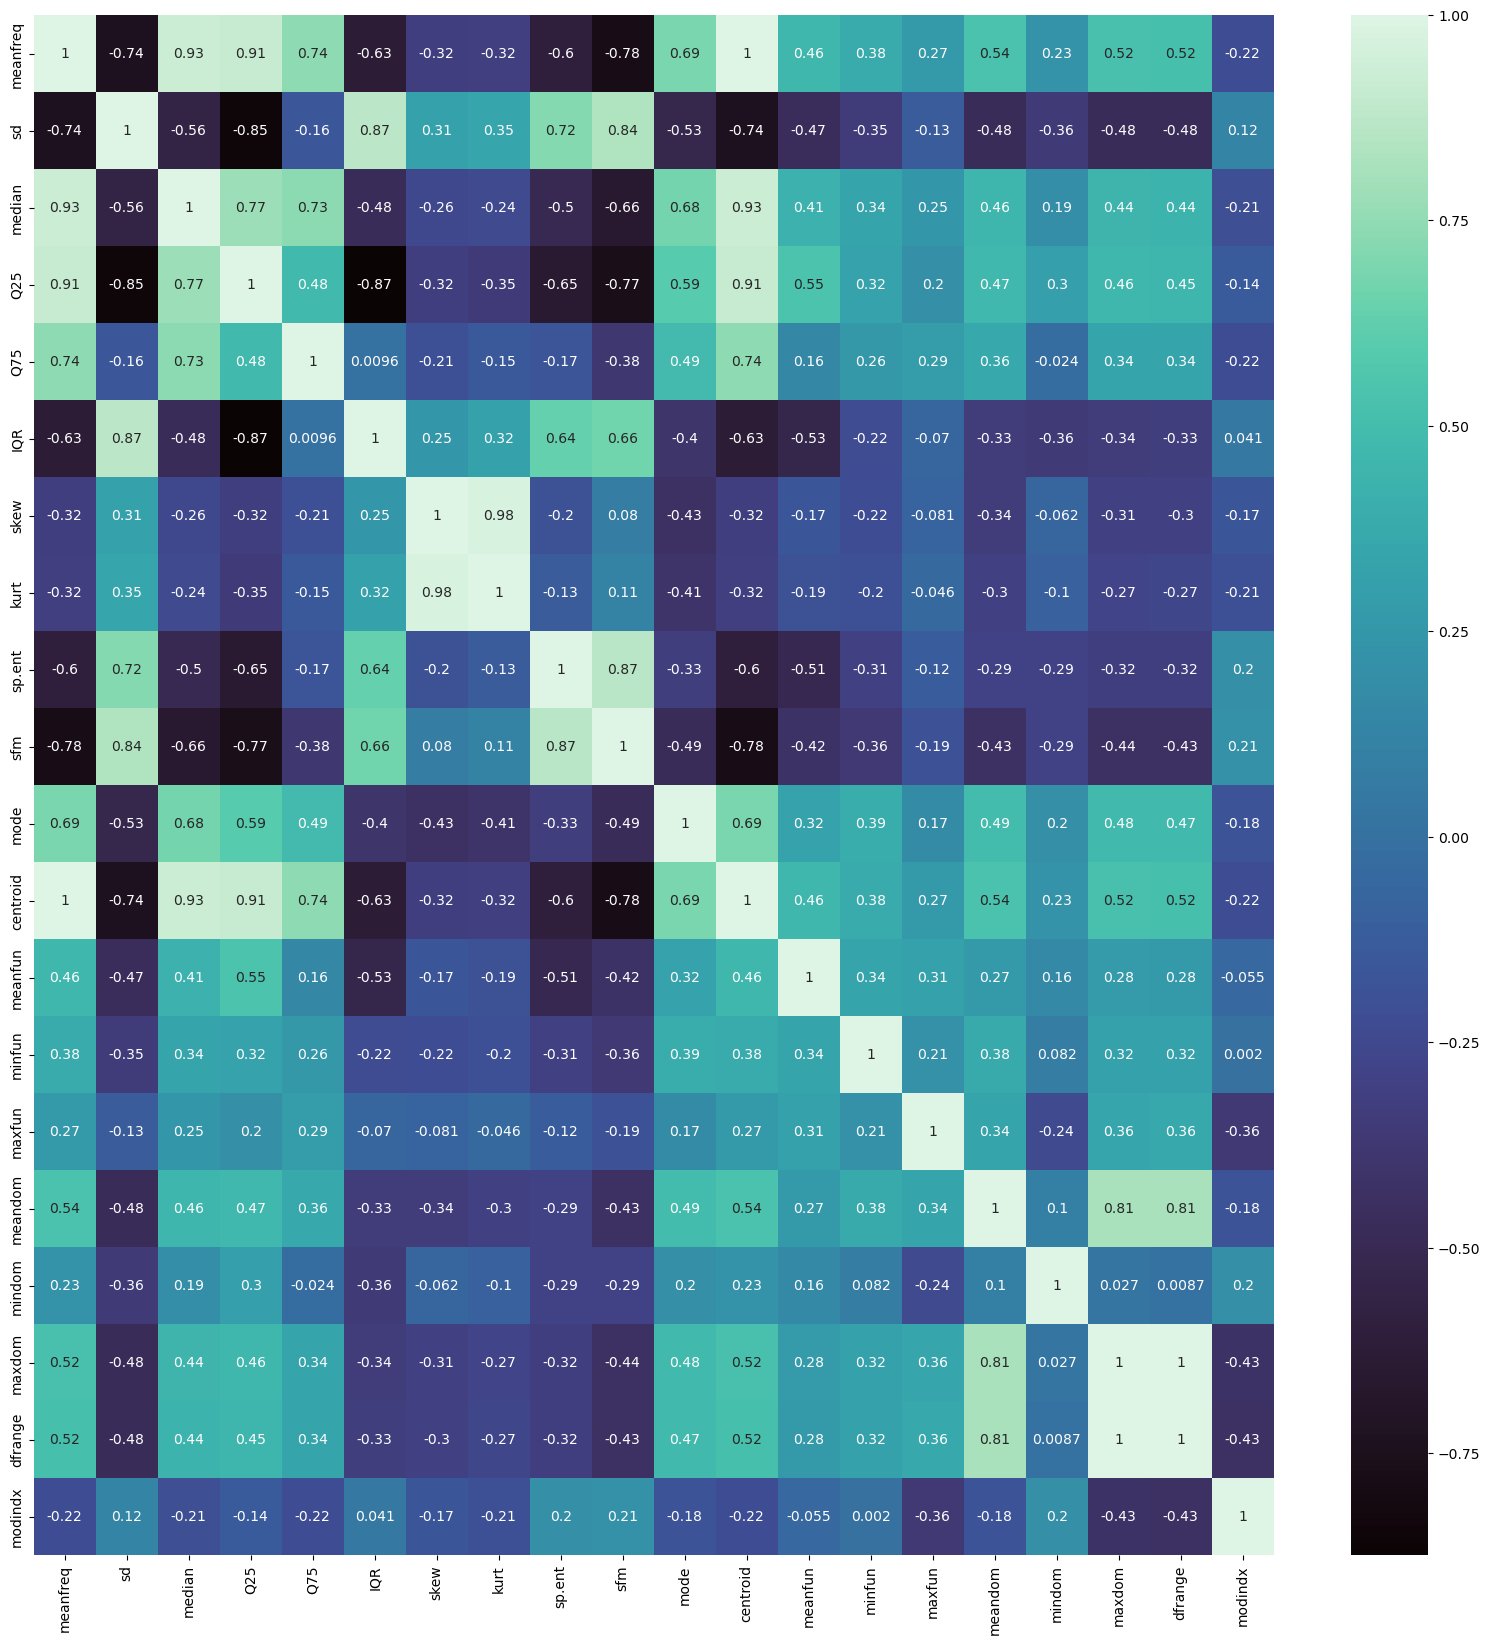

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='mako')
plt.show()

# Distribution of Categorical Column

<AxesSubplot:>

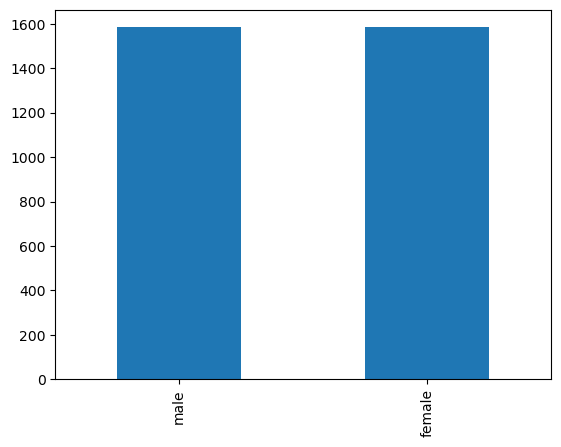

In [16]:
df['label'].value_counts().plot(kind='bar')

# Checking for Missing Values in the Dataset

In [17]:
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

* There is not null values in the dataset

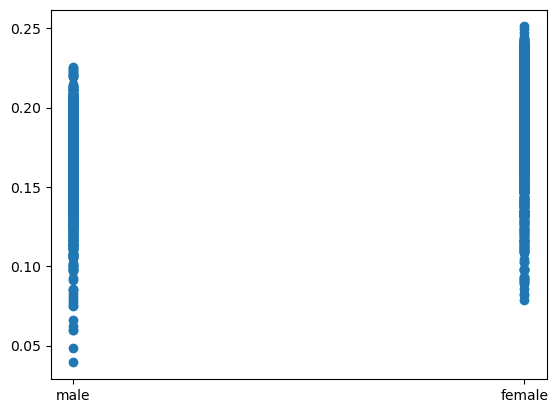

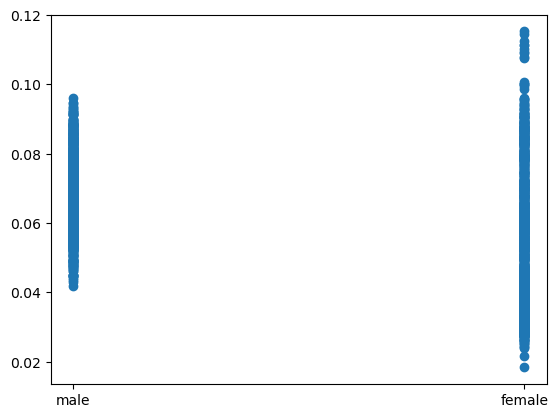

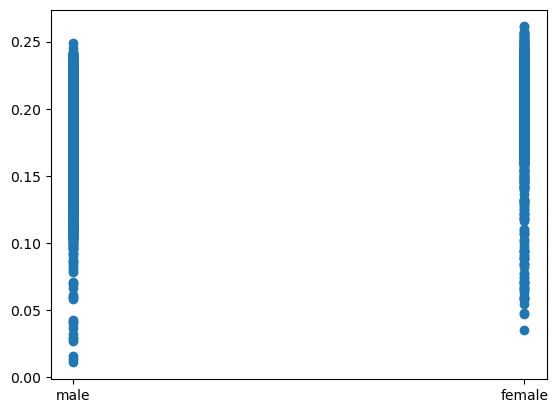

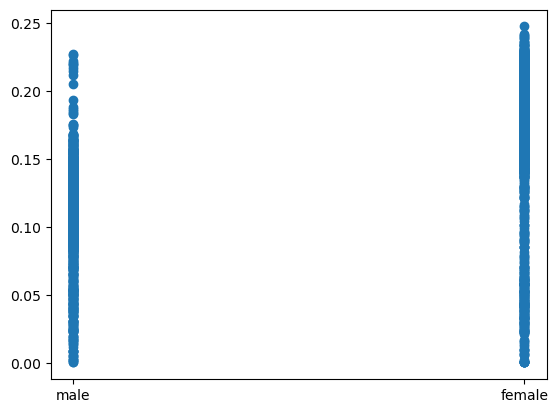

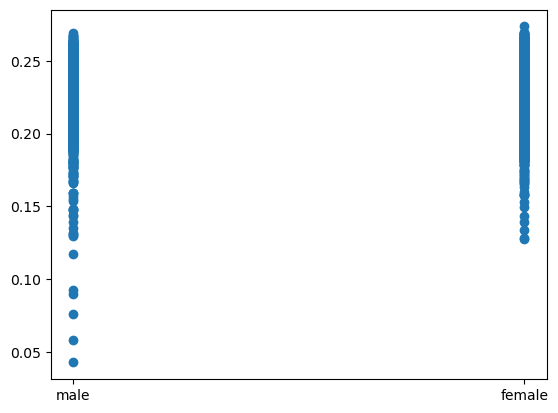

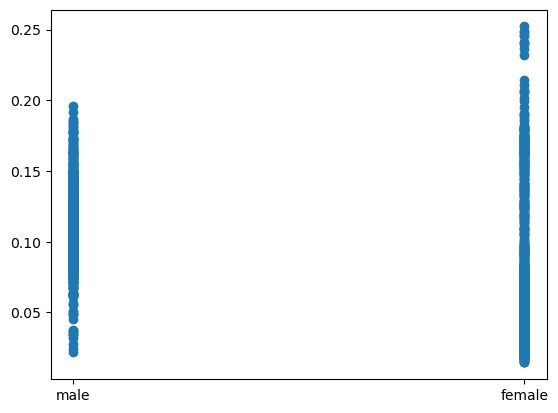

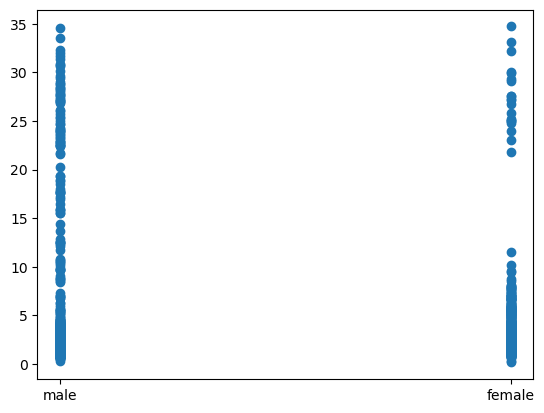

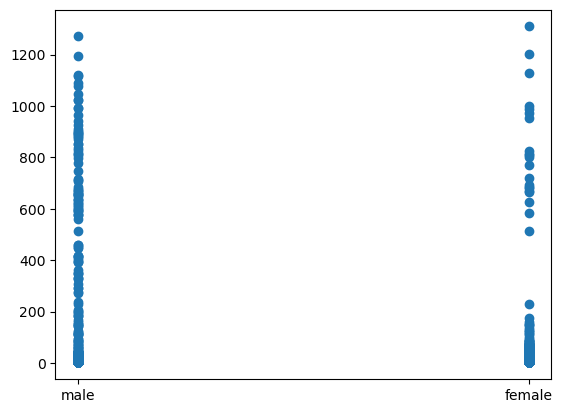

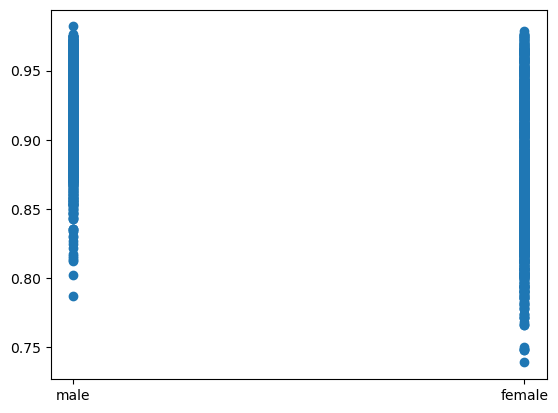

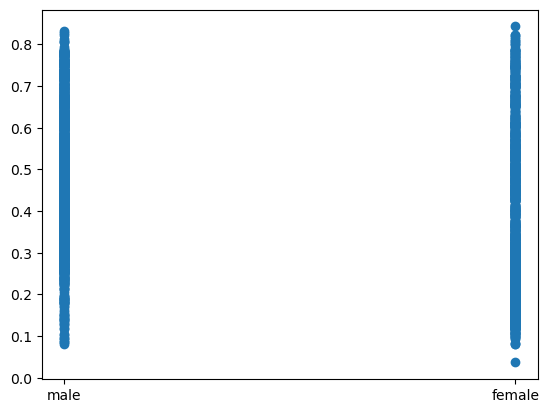

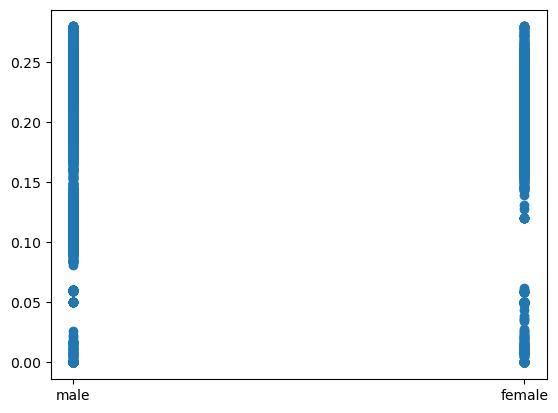

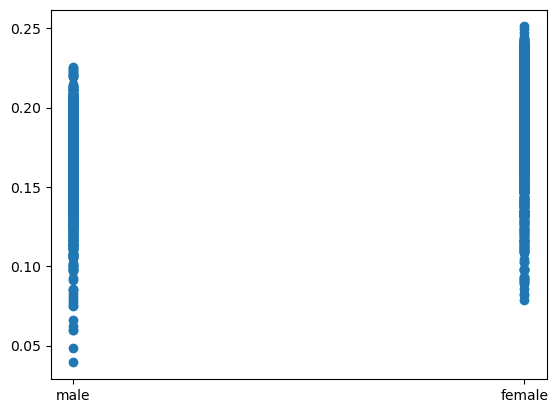

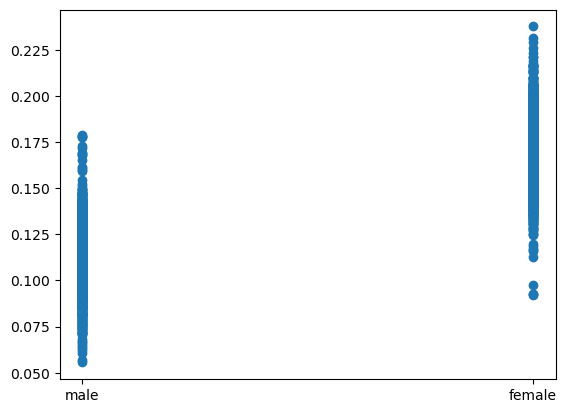

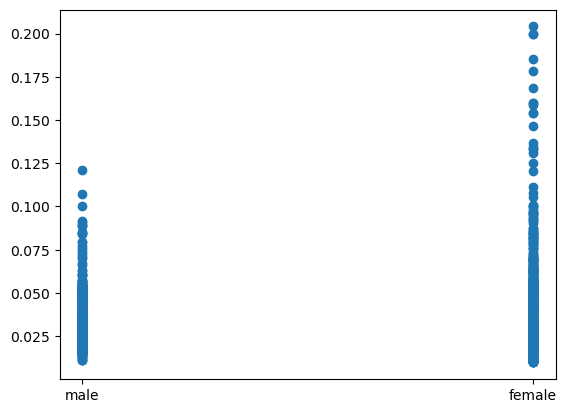

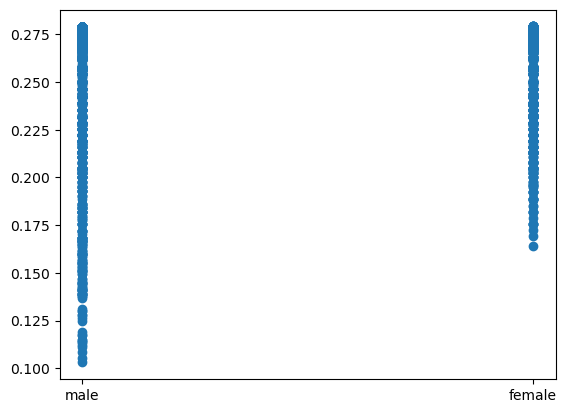

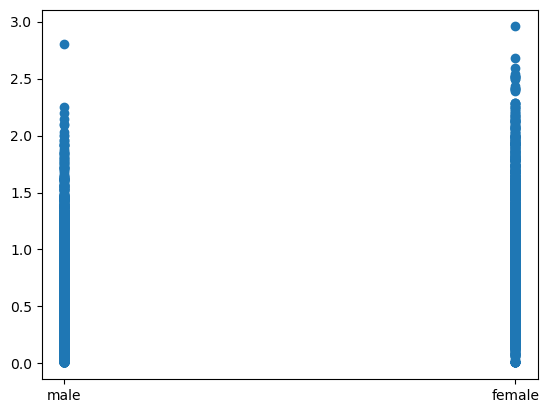

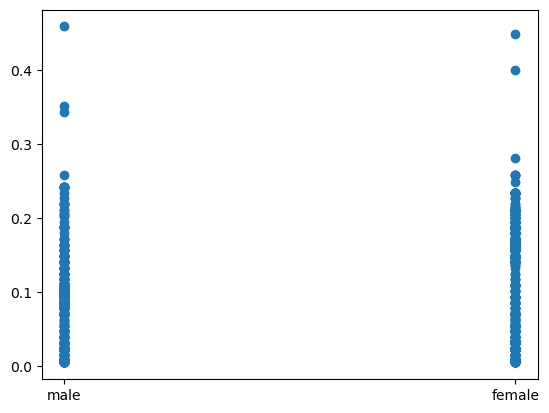

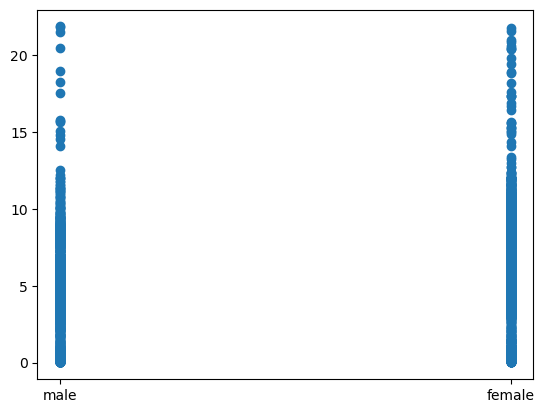

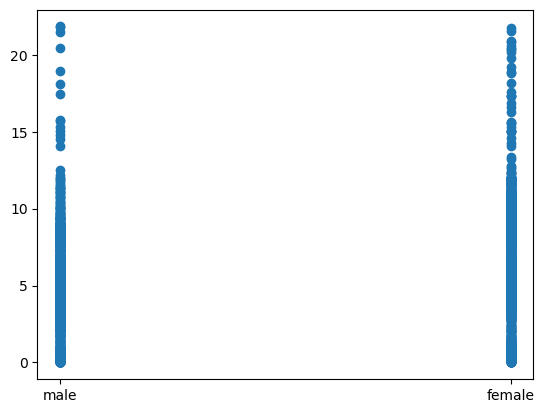

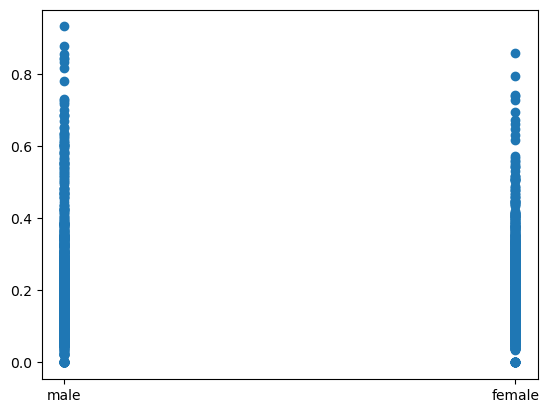

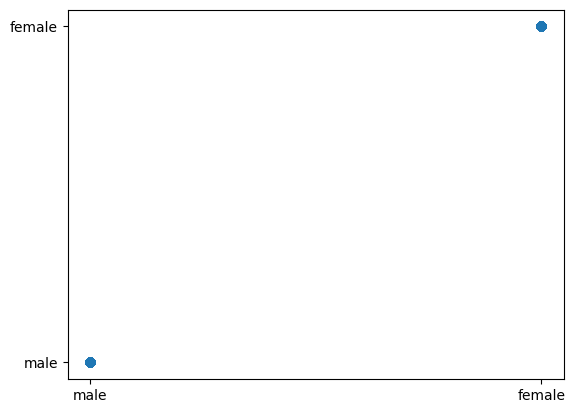

In [20]:

for column in df.columns:
    plt.scatter(y=column,x='label',data=df)
    plt.show()

# Encoding the label column

In [22]:
label_encoder=LabelEncoder()
df['label']=label_encoder.fit_transform(df['label'])

In [23]:
dict(enumerate(label_encoder.classes_))

{0: 'female', 1: 'male'}

In [35]:
def preprocess_inputs(df):
    df=df.copy()
    #splitting between feature and target
    y=df['label']
    x=df.drop('label',axis=1)
    #scaling the dataset
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    
    
    
    return x_train,x_test,y_train,y_test

In [36]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2217, 20)
(951, 20)
(2217,)
(951,)


In [40]:
y_test


2693    0
2081    0
207     1
1049    1
2947    0
       ..
1572    1
1584    0
1992    0
539     1
496     1
Name: label, Length: 951, dtype: int64

# Constructing the Neural Network Model

In [41]:
input=tf.keras.Input(shape=(20,))
x=tf.keras.layers.Dense(64,activation='relu')(input)
x=tf.keras.layers.Dense(64,activation='relu')(x)
output=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.Model(inputs=input,outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])
history=model.fit(x_train,y_train,validation_split=0.2,batch_size=32,epochs=100,
                 callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,
                                                            restore_best_weights=True)])


Epoch 1/100
56/56 [==============================] - 2s 9ms/step - loss: 0.4387 - accuracy: 0.8150 - auc: 0.9119 - val_loss: 0.2062 - val_accuracy: 0.9572 - val_auc: 0.9933
Epoch 2/100
56/56 [==============================] - 0s 4ms/step - loss: 0.1497 - accuracy: 0.9622 - auc: 0.9930 - val_loss: 0.0871 - val_accuracy: 0.9797 - val_auc: 0.9966
Epoch 3/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0867 - accuracy: 0.9718 - auc: 0.9958 - val_loss: 0.0697 - val_accuracy: 0.9820 - val_auc: 0.9971
Epoch 4/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0708 - accuracy: 0.9780 - auc: 0.9969 - val_loss: 0.0636 - val_accuracy: 0.9820 - val_auc: 0.9969
Epoch 5/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0636 - accuracy: 0.9791 - auc: 0.9969 - val_loss: 0.0599 - val_accuracy: 0.9865 - val_auc: 0.9972
Epoch 6/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0602 - accuracy: 0.9803 - auc: 0.9975 - val_loss: 0.0553 - v

In [47]:
y_pred=np.squeeze(model.predict(x_test))

30/30 [==============================] - 0s 1ms/step


In [49]:
model.evaluate(x_test,y_test)

30/30 [==============================] - 0s 2ms/step - loss: 0.0773 - accuracy: 0.9737 - auc: 0.9948


[0.07728584110736847, 0.9737119078636169, 0.9947686791419983]

In [52]:
threshold = 0.5
y_pred = (y_pred >= threshold).astype(int)

# Confusion_Matrix

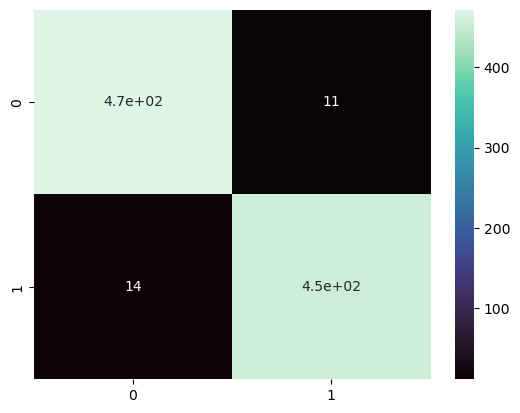

In [56]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='mako')
plt.show()

# Classification Report

In [61]:
clr=classification_report(y_test,y_pred)
print(clr)


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       483
           1       0.98      0.97      0.97       468

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951

